## Requesting freshness

In this portion, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

In [1]:
import requests
import requests_cache
import pandas as pd
import json
from matplotlib import pyplot as plt

requests_cache.install_cache('demo_cache')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
def ndb_search(keyword):
    response = requests.get("https://api.nal.usda.gov/ndb/search", params = {
    "api_key":  "ORYm8pVE8rY6Bm9ulyq0FxvK8RMyks5JFquPg5oa",
    "q":keyword,
    "ds": "",
    "group":"",
    "format": "JSON",
    "sort":'n',
    })
    return response.json()['list']['item']

In [3]:
ndb_search("quail eggs")

[{'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  'ndbno': '45099560',
  'offset': 0},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  'ndbno': '45094707',
  'offset': 1},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': "D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  'ndbno': '45178254',
  'offset': 2},
 {'ds': 'SR',
  'group': 'Dairy and Egg Products',
  'name': 'Egg, quail, whole, fresh, raw',
  'ndbno': '01140',
  'offset': 3},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  'ndbno': '45169279',
  'offset': 4},
 {'ds': 'BL',
  'group': 'Branded Food Products Database',
  'name': 'L&W, QUAIL EGGS, UPC: 024072000256',
  'ndbno': '45094890',
  'offset': 5}]


* For each food in fresh.csv, re-adjust the name before search the information
* After the information was captured, only keep those response that records raw and unbranded food
* Note that for some food, the search is nor success, in this case its ndbno will be assigned as "None", and those food will be dropped at the end. 


In [4]:
import pandas as pd
import os
fresh = pd.read_csv("fresh.csv")
food_name = fresh['food']
maincolumns = ["food_name",'ndbno']
ndb_all = pd.DataFrame(columns=maincolumns)

In [5]:
import numpy as np
ndbno_result2=[]
for f in food_name:
    #search for raw food only 
    f = f.replace('_',' ') + ", raw"
    #some search would not work 
    try:
        ndb_result = ndb_search(f)
        ndbno_result = pd.DataFrame(ndb_result)
        #keep the search result that is unbranded 
        ndbno_result = ndbno_result.loc[(ndbno_result['ds'] == 'SR')]
        sLength = len(ndbno_result['ndbno'])
        food_name_column = np.repeat(f, sLength)
        ndbno_result["food_name"] = food_name_column
        ndbno_result = ndbno_result[["food_name",'ndbno']]
    #for those search won't work, assign "None" to it's ndbno value 
    except:
        ndbno_result = pd.DataFrame(columns = ["food_name",'ndbno'])
        ndbno_result["food_name"] = [f]
        ndbno_result["ndbno"] = ['None']
        
    ndbno_result2.append(ndbno_result)
    
ndb_all = pd.concat(ndbno_result2, ignore_index=True)
ndb_all = ndb_all.loc[(ndb_all['ndbno'] != 'None')]

In [49]:
ndb_all_1 = ndb_all.drop_duplicates(subset=['food_name'], keep="first")
ndb_all_1 =ndb_all_1.reset_index()
ndb_all_1 = ndb_all_1 [["food_name","ndbno"]]
ndb_all_1

,food_name,ndbno
0,"watermelon, raw",09326
1,"cantaloupe, raw",09181
2,"tangerines, raw",09221
3,"strawberries, raw",09140
4,"plums, raw",09061
5,"oranges, raw",15073
6,"raspberries, raw",09302
7,"pomegranate, raw",09286
8,"pineapple, raw",09266
9,"apricots, raw",09021


In [7]:
def ndb_report(keyword):
    response = requests.get("https://api.nal.usda.gov/ndb/V2/reports", params = {
    "api_key":  "ORYm8pVE8rY6Bm9ulyq0FxvK8RMyks5JFquPg5oa",
    "ndbno":keyword,
    "type": "b",
    "format": "JSON",
    })
    my_dict = response.json()['foods'][0]['food']['nutrients']

    for i in list(range(len(my_dict))):
        del my_dict[i]['derivation']
    return my_dict


* The best combination was determined by calories and the ratio between yield and price.
* Since the higher the yield and calories, the easier for people to gain nutrition from this type of food.
* Similarly, the higher the price, the more unlikely for people to gain nutrition from this type of food.

* Thus the higher the calories and the ratio between yield and price, the higher chance for this type of food to be the best combination of price, yield, and nutrition.

In [19]:
ndbno_all = ndb_all['ndbno']
(a,b) = ndb_all.shape
energy_all = np.empty((0, a))

#get the calories information(which instored in energy column) for each ndbno
for ndbno in ndbno_all:
    food_report_one_food = ndb_report(ndbno)
    energy_one_food = food_report_one_food[1]['value']
    energy_all = np.append(energy_all, [energy_one_food])

In [38]:
final = ndb_all.copy()
final["energy"] = energy_all

#since there's multiple information about same food, and the energy values are similar same food with different ndbno
#(the energy value only differs for 1 or 2 unit)
#the duplicate was drop and only keep the first term 

final = final.drop_duplicates(subset=['food_name'], keep="first")
final = final.reset_index()
final.sort_values(["energy"],ascending=False).head()


,index,food_name,ndbno,energy
20,73,"grapes, raw",11974,93
13,33,"bananas, raw",09040,89
7,21,"pomegranate, raw",09286,83
29,148,"potatoes, raw",11352,77
5,10,"oranges, raw",15073,76


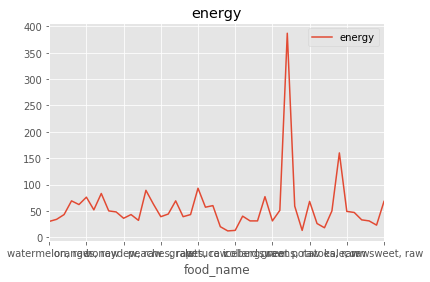

In [44]:
#plot graph
final[["energy"]] = final[["energy"]].apply(pd.to_numeric)
final.plot(y='energy',x="food_name",title="energy")
plt.show()

In [39]:
food_name = final["food_name"]
yield_price = pd.DataFrame(columns=["price_per_lb","yield"])

#search for yield and price information from fresh.csv
for f in food_name:
    f = f.replace(', raw','')
    f = f.replace(' ', '_')
    result_for_one = fresh.loc[(fresh['food'] == f)]
    result_for_one = result_for_one[["price_per_lb","yield","food"]]
    yield_price = pd.concat([result_for_one,yield_price],ignore_index=True)

#calculate ratio and drop duplicate terms
yield_price["yield_price_ratio"]= yield_price["yield"]/yield_price["price_per_lb"]
yield_price = yield_price.drop_duplicates(subset=['food'], keep="first")
yield_price = yield_price.reset_index()
yield_price.sort_values(["yield_price_ratio"],ascending=False).head()


,index,food,price_per_lb,yield,yield_price_ratio
45,47,watermelon,0.333412,0.520000,1.559632
16,17,potatoes,0.564320,0.811301,1.437662
11,11,cabbage,0.579208,0.778797,1.344589
32,34,bananas,0.566983,0.640000,1.128781
44,46,cantaloupe,0.535874,0.510000,0.951717


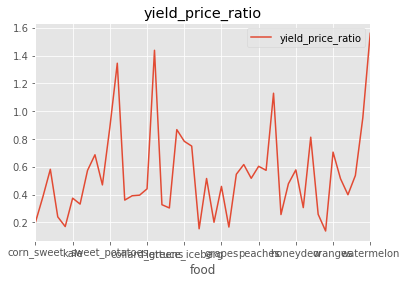

In [45]:
#plot graph
yield_price[["yield_price_ratio"]] = yield_price[["yield_price_ratio"]].apply(pd.to_numeric)
yield_price.plot(y='yield_price_ratio',x="food",title="yield_price_ratio")
plt.show()

* Note that potatoes appears both in the top 5 highest yield_price_ratio and highest energy table, thus we can conclude that potato has the highest nutrition.
